In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import math

from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords   
import pprint
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
import matplotlib.pyplot as plt

In [2]:
import glob

# Text Summarization Using TF-IDF

##### Tf=No of times term appears in document/Total terms in document Idf=log_e(Total number of documents / Number of documents with term in it)

### Creating frequency matrix for each word

In [3]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()
    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

### Calculating Term Frequency

In [4]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence
            tf_matrix[sent] = tf_table
    return tf_matrix

### Creating table which stores total no of words in a document

In [5]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

### Calculating IDF

In [6]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

### Calculatin TF-Idf

In [7]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

### Giving TF-Idf score to each sentence

In [8]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

### Calculating average sentence score which will be used to decide the threshold

In [9]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    if len(sentenceValue)!=0:
        average = (sumValues / len(sentenceValue))
    else:
        average = sumValues
    return average

### Generate summary which includes sentences with score greater than the threshold

In [10]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1
    return summary

## Main Function

In [11]:
def summary_generator(text):
    # 1 Sentence Tokenize
    sentences = sent_tokenize(text)
    total_documents = len(sentences)
    #print(sentences)

    # 2 Create the Frequency matrix of the words in each sentence.
    freq_matrix = _create_frequency_matrix(sentences)
    #print(freq_matrix)

    # 3 Calculate TermFrequency and generate a matrix
    tf_matrix = _create_tf_matrix(freq_matrix)
    #print(tf_matrix)

    # 4 creating table for documents per words
    count_doc_per_words = _create_documents_per_words(freq_matrix)
    #print(count_doc_per_words)

    # 5 Calculate IDF and generate a matrix
    idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
    #print(idf_matrix)

    # 6 Calculate TF-IDF and generate a matrix
    tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
    #print(tf_idf_matrix)

    # 7 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(tf_idf_matrix)
    #print(sentence_scores)

    # 8 Find the threshold
    threshold = _find_average_score(sentence_scores)
    #print(threshold)

    # 9 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores,threshold)
    return summary

In [100]:
def printsummary(fileName):
    with open(fileName+".txt", 'r') as maintext:
        maindata = maintext.read().replace('\n', '')
    print(summary_generator(maindata))

In [12]:
import pprint
stopWords=stopwords.words('english')

In [56]:
def cosine_similarityval(summary_list):
    train_set=summary_list
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopWords)
    tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_set)
    return (cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))
    

In [96]:
def showSimilarFiles(folderName,fileName):
    txt_files=glob.glob(folderName+"/*.txt")
    with open(fileName+".txt", 'r') as maintext:
        maindata = maintext.read().replace('\n', '')
    text_list=[]
    text_list.append(maindata)
    for file in txt_files:
        with open(file, 'r') as text:
            data = text.read().replace('\n', '')
        text_list.append(data)
    summary_list=[]
    for text in text_list:
        summary=summary_generator(text)
        summary_list.append(summary)
    finalsimval=cosine_similarityval(summary_list)
    similaritylist={}
    similaritylist[fileName]=finalsimval[0][0]
    i=1
    while i < len(finalsimval[0]):
        similaritylist[txt_files[i-1]]=finalsimval[0][i]
        i=i+1
    finallist=[]
    finallist2=[]
    for i in similaritylist:
        maxel=-1
        key=""
        for j in similaritylist:
            if similaritylist[j]>maxel:
                maxel=similaritylist[j]
                key=j
        finallist2.append(maxel)
        similaritylist[key]=-2
        finallist.append(key)
    fol=len(folderName)
    finallist3=[]
    for i in finallist[1:]:
        print(i)
    for i in finallist[1:]:
        finallist3.append(i[fol+1:])
    matplotlib.pyplot.bar(finallist3,finallist2[1:], width=0.2, bottom=None, align='edge', data=None)

Docs\cow4.txt
Docs\tiger2.txt
Docs\elephant.txt
Docs\peacock.txt
Docs\tiger.txt
Docs\women.txt
Docs\pollution.txt


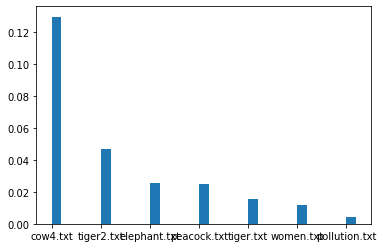

In [97]:
showSimilarFiles("Docs",'cow1')

In [102]:
printsummary('cow1')

 She eats grass, hay, fodder and grains. But she likes to graze green grasses in an open field. We keep cow in a cattle or a shed. In India, she is called as “Gaou Mata”. She has many religious significances for Hindus. They respect her as their mother. But the modern cattle are divided into two breeds. Some have their origin in India and some in Europe. The modern two breeds of cattle are Bos Taurus and Bos Indicus. Bos Taurus:Bos Taurus cattle are also known as Taurine cattle. Bos Indicus:Bos Indicus is also known as Zebus cattle. Her milk is used in various ways. Some people use it as a medicine and some for the religious purposes. Indian Hindus worship her on their festivals.
